#### Importing Python libraries

In [2]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

#### Loading the dataset

In [3]:
df = pd.read_csv('heart.csv')

#### Displaying the first 5 observations

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Displaying the last 5 observations

In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


#### Displaying the number of observations(rows) and attributes(columns)

In [6]:
df.shape

(918, 12)

#### Displaying the attributes and their data type

In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Data Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate or incomplete data within a dataset. If data is incorrect, outcomes and algorithms become unreliable, even though they may be implemented correctly because of this it becomes crucial to perform data cleaning.

The most common data cleaning practices include:

<ul style="list-style-type:square">
    <li>Handling missing data</li>
    <li>Removing duplicate or irrelevant observations</li>
    <li>Fixing structural errors such as strange naming conventions, typos or incorrect capitalization</li>
    <li>Filtering unwanted outliers (if needed)</li>
</ul>

- Handling missing data

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- Handling duplicate data

In [9]:
df.duplicated().sum()

0

- Fixing structural errors

In [10]:
for col in df.columns:
    print(col)
    print(set(df[col]), "\n")

Age
{28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77} 

Sex
{'F', 'M'} 

ChestPainType
{'ATA', 'ASY', 'TA', 'NAP'} 

RestingBP
{128, 0, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 129, 148, 150, 152, 154, 155, 156, 158, 160, 164, 165, 170, 172, 174, 178, 180, 185, 190, 192, 200, 80, 92, 94, 95, 96, 98, 100, 101, 102, 104, 105, 106, 108, 110, 112, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127} 

Cholesterol
{0, 518, 529, 564, 85, 603, 100, 110, 113, 117, 123, 126, 129, 131, 132, 139, 141, 142, 147, 149, 152, 153, 156, 157, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

- Handling outliers

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Data Preprocessing

<ul style="list-style-type:square">
    <li>Normalizing Data</li>
    <li>Converting categorical data into numerical data</li>
</ul>

- Normalizing Data

In [12]:
scaler = MinMaxScaler()
data = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
scaler.fit(data)
scaled_data = np.matrix(scaler.transform(data))
print(scaled_data)

[[0.24489796 0.7        0.47927032 0.78873239 0.29545455]
 [0.42857143 0.8        0.29850746 0.67605634 0.40909091]
 [0.18367347 0.65       0.46932007 0.26760563 0.29545455]
 ...
 [0.59183673 0.65       0.2172471  0.38732394 0.43181818]
 [0.59183673 0.65       0.39137645 0.8028169  0.29545455]
 [0.20408163 0.69       0.29021559 0.79577465 0.29545455]]


In [13]:
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
scaled_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.244898,0.70,0.479270,0.788732,0.295455
1,0.428571,0.80,0.298507,0.676056,0.409091
2,0.183673,0.65,0.469320,0.267606,0.295455
3,0.408163,0.69,0.354892,0.338028,0.465909
4,0.530612,0.75,0.323383,0.436620,0.295455


In [14]:
for col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
    df.drop(col, axis=1)
    df[col] = scaled_df[col]


df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,M,ATA,0.70,0.479270,0,Normal,0.788732,N,0.295455,Up,0
1,0.428571,F,NAP,0.80,0.298507,0,Normal,0.676056,N,0.409091,Flat,1
2,0.183673,M,ATA,0.65,0.469320,0,ST,0.267606,N,0.295455,Up,0
3,0.408163,F,ASY,0.69,0.354892,0,Normal,0.338028,Y,0.465909,Flat,1
4,0.530612,M,NAP,0.75,0.323383,0,Normal,0.436620,N,0.295455,Up,0


- Converting categorical data into numerical data

In [15]:
df = pd.get_dummies(df) 
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


### Feature Selection

In [16]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,1,0,0,1,0,0,1,0,1,0,0,0,1


### Naïve Bayes

The Naïve Bayes classifier is a supervised machine learning algorithm which is used for classification. It is also part of the family of generative learning algorithms which means that it seeks to model the distribution of inputs of a given class or category. Unlike discriminative classifiers, like logistic regression, it does not learn which features are most important to differentiate between classes.

Naïve Bayes is also known as a probabilistic classifier since it is based on Bayes’ Theorem. Bayes’ Theorem is distinguished by its use of sequential events where information acquired later impacts the initial probability. These probabilities are denoted as the prior probability and the posterior probability. The prior probability is the probability of the occurence of an event before it has been contextualized under a certain condition whereas the posterior probability is the probability of the occurence of an event after it has been contextualized under a certain condition.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Fitting the Gaussian Naïve Bayes model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Making predictions on test set
y_pred = gnb.predict(x_test)

# Actual values VS Predicted values
gnb_data = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
gnb_data.head()

,Actual value,Predicted value
242,1,1
441,1,1
260,0,0
546,1,1
847,0,0


<Axes: >

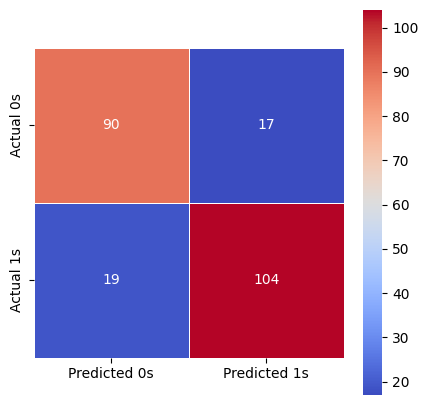

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='coolwarm')

In [19]:
# Model Evaluation
print('Model Accuracy:  ', accuracy_score(y_test, y_pred))
print('Model Precision: ', precision_score(y_test, y_pred))
print('Model Recall:    ', recall_score(y_test, y_pred))
print('Model F1 Score:  ', f1_score(y_test, y_pred))

Model Accuracy:   0.8434782608695652
Model Precision:  0.859504132231405
Model Recall:     0.8455284552845529
Model F1 Score:   0.8524590163934428


### Logistic Regression

Logistic Regression is used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on the attributes of the dataset. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds which means that the probability of success divided by the probability of failure

In [20]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [i / 10 for i in range(1, 11)],
    'fit_intercept': [True, False],
    'solver': ['liblinear', 'saga']
}

lr = LogisticRegression(n_jobs=-1)
lr_cv = GridSearchCV(lr, param_grid, n_jobs=-1, refit=False, scoring='precision', cv=5)
lr_cv.fit(x, y)

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             refit=False, scoring='precision')

In [21]:
print("Best Score: ", lr_cv.best_score_)
print("Best Parameter Combination: \n", lr_cv.best_params_)

Best Score:  0.8556361572931686
Best Parameter Combination: 
 {'C': 0.1, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Fitting the Logistic Regression model
lr = LogisticRegression(penalty='l1', C=0.1, fit_intercept=True, solver='liblinear')
lr.fit(x_train, y_train)

# Making predictions on test set
y_pred = lr.predict(x_test)

# Actual values VS Predicted values
lr_data = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
lr_data.head()

,Actual value,Predicted value
242,1,1
441,1,1
260,0,0
546,1,1
847,0,0


<Axes: >

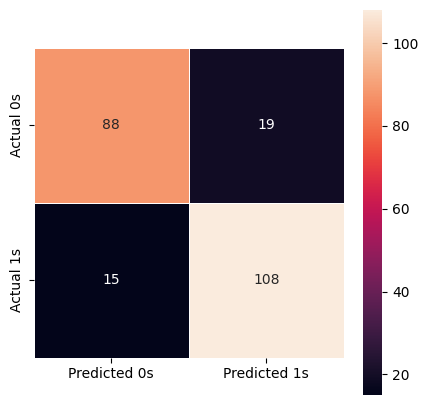

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='rocket')

In [24]:
# Model Evaluation
print('Model Accuracy:  ', accuracy_score(y_test, y_pred))
print('Model Precision: ', precision_score(y_test, y_pred))
print('Model Recall:    ', recall_score(y_test, y_pred))
print('Model F1 Score:  ', f1_score(y_test, y_pred))

Model Accuracy:   0.8521739130434782
Model Precision:  0.8503937007874016
Model Recall:     0.8780487804878049
Model F1 Score:   0.8639999999999999


### Support Vector Machine

Support Vector Machine or SVM is used for Classification as well as Regression problems. Primarily it is used for Classification problems in Machine Learning. The goal in SVM is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily categorize new data points. This best decision boundary is called a hyperplane. SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence the algorithm is termed as Support Vector Machine.

In [25]:
param_grid = {
    'C': [i / 10 for i in range(1, 11)],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovr', 'ovo']
}

svm = SVC()
svm_cv = GridSearchCV(svm, param_grid, n_jobs=-1, refit=False, scoring='precision', cv=5)
svm_cv.fit(x, y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit=False, scoring='precision')

In [26]:
print("Best Score: ", svm_cv.best_score_)
print("Best Parameter Combination: \n", svm_cv.best_params_)

Best Score:  0.8723394088251577
Best Parameter Combination: 
 {'C': 0.2, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'sigmoid'}


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Fitting the SVM model
svm = SVC(C=0.2, kernel='sigmoid', gamma='scale', decision_function_shape='ovr')
svm.fit(x_train, y_train)

# Making predictions on test set
y_pred = svm.predict(x_test)

# Actual values VS Predicted values
svm_data = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
svm_data.head()

,Actual value,Predicted value
242,1,1
441,1,1
260,0,0
546,1,1
847,0,0


<Axes: >

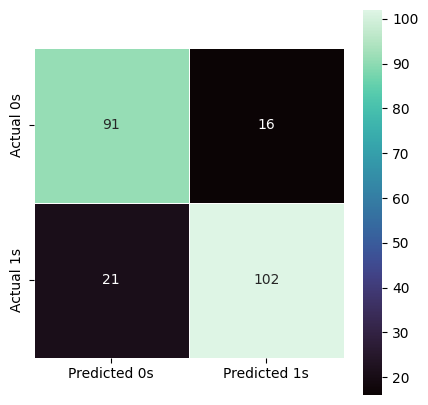

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='mako')

In [29]:
# Model Evaluation
print('Model Accuracy:  ', accuracy_score(y_test, y_pred))
print('Model Precision: ', precision_score(y_test, y_pred))
print('Model Recall:    ', recall_score(y_test, y_pred))
print('Model F1 Score:  ', f1_score(y_test, y_pred))

Model Accuracy:   0.8391304347826087
Model Precision:  0.864406779661017
Model Recall:     0.8292682926829268
Model F1 Score:   0.8464730290456431


### kNN

The k-nearest neighbors algorithm, also known as kNN is a supervised learning algorithm which uses proximity to make classifications or predictions about the grouping of individual data points. It can be used for both regression and classification problems but is typically used as a classification algorithm, working off the assumption that similar points can be found near one another

The kNN algorithm thus can be considered as a voting system, where the majority class label determines the class label of a new data point among its nearest ‘k’ neighbors in the feature space. Imagine a small village with a few hundred residents, and you must decide which political party you should vote for. To do this, you might go to your nearest neighbors and ask which political party they support. If the majority of your 'k' nearest neighbors support party A, then you would most likely also vote for party A. This is similar to how the kNN algorithm works where the majority class label determines the class label of a new data point among its k nearest neighbors

In [30]:
param_grid = {
    'n_neighbors': [i for i in range(5, 10)],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'l1', 'l2', 'manhattan']
}

knn = KNeighborsClassifier(n_jobs=-1)
knn_cv = GridSearchCV(knn, param_grid, n_jobs=-1, refit=False, scoring='precision', cv=5)
knn_cv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'l1', 'l2', 'manhattan'],
                         'n_neighbors': [5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             refit=False, scoring='precision')

In [31]:
print("Best Score: ", knn_cv.best_score_)
print("Best Parameter Combination: \n", knn_cv.best_params_)

Best Score:  0.8505173652321277
Best Parameter Combination: 
 {'algorithm': 'ball_tree', 'metric': 'l1', 'n_neighbors': 9, 'weights': 'uniform'}


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Fitting the kNN model
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='ball_tree', metric='l1', n_jobs=-1)
knn.fit(x_train, y_train)

# Making predictions on test set
y_pred = knn.predict(x_test)

# Actual values VS Predicted values
knn_data = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
knn_data.head()

,Actual value,Predicted value
242,1,1
441,1,1
260,0,0
546,1,1
847,0,0


<Axes: >

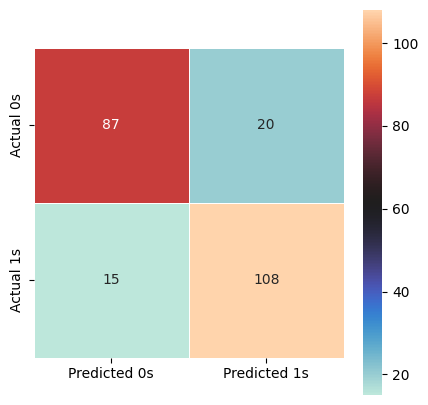

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='icefire')

In [34]:
# Model Evaluation
print('Model Accuracy:  ', accuracy_score(y_test, y_pred))
print('Model Precision: ', precision_score(y_test, y_pred))
print('Model Recall:    ', recall_score(y_test, y_pred))
print('Model F1 Score:  ', f1_score(y_test, y_pred))

Model Accuracy:   0.8478260869565217
Model Precision:  0.84375
Model Recall:     0.8780487804878049
Model F1 Score:   0.8605577689243028


### Decision Tree

In [35]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [i for i in range(2, 11)],
    'min_samples_leaf': [i for i in range(1, 11)]
}

d_tree = DecisionTreeClassifier()
d_tree_cv = GridSearchCV(d_tree, param_grid, n_jobs=-1, refit=False, scoring='precision', cv=5)
d_tree_cv.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             refit=False, scoring='precision')

In [36]:
print("Best Score: ", d_tree_cv.best_score_)
print("Best Parameter Combination: \n", d_tree_cv.best_params_)

Best Score:  0.8411426382984812
Best Parameter Combination: 
 {'criterion': 'log_loss', 'min_samples_leaf': 3, 'min_samples_split': 7}


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Fitting the Decision Tree model
d_tree = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=3, min_samples_split=7)
d_tree.fit(x_train, y_train)

# Making predictions on test set
y_pred = d_tree.predict(x_test)

# Actual values VS Predicted values
d_tree_data = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
d_tree_data.head()

,Actual value,Predicted value
242,1,1
441,1,1
260,0,0
546,1,0
847,0,1


In [38]:
# Model Evaluation
print('Model Accuracy:  ', accuracy_score(y_test, y_pred))
print('Model Precision: ', precision_score(y_test, y_pred))
print('Model Recall:    ', recall_score(y_test, y_pred))
print('Model F1 Score:  ', f1_score(y_test, y_pred))

Model Accuracy:   0.782608695652174
Model Precision:  0.8067226890756303
Model Recall:     0.7804878048780488
Model F1 Score:   0.7933884297520661


### Ensemble - Voting Classifier

In [39]:
models = [
    ('Naïve Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(penalty='l1', C=0.1, fit_intercept=True, solver='liblinear')),
    ('SVM', SVC(C=0.2, kernel='sigmoid', gamma='scale', decision_function_shape='ovr')),
    ('kNN', KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='ball_tree', metric='l1', n_jobs=-1)),
    ('Decision Tree', DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=3, min_samples_split=7))
]

In [40]:
param_grid = {
    'voting': ['hard', 'soft']
}

voting = VotingClassifier(estimators=models, n_jobs=-1)
voting_cv = GridSearchCV(voting, param_grid, n_jobs=-1, refit=True, scoring='precision', cv=5)
voting_cv.fit(x, y)

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.86439319        nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('Naïve Bayes',
                                                     GaussianNB()),
                                                    ('Logistic Regression',
                                                     LogisticRegression(C=0.1,
                                                                        penalty='l1',
                                                                        solver='liblinear')),
                                                    ('SVM',
                                                     SVC(C=0.2,
                                                         kernel='sigmoid')),
                                                    ('kNN',
                                                     KNeighborsClassifier(algorithm='ball_tree',
                                                                          metric='l1',
                                                                          n_jobs=-1,
                                                                          n_neighbors=9)),
                                                    ('Decision Tree',
                                                     DecisionTreeClassifier(criterion='log_loss',
                                                                            min_samples_leaf=3,
                                                                            min_samples_split=7))],
                                        n_jobs=-1),
             n_jobs=-1, param_grid={'voting': ['hard', 'soft']},
             scoring='precision')

In [41]:
print("Best Score: ", voting_cv.best_score_)
print("Best Parameter Combination: \n", voting_cv.best_params_)

Best Score:  0.864393190979803
Best Parameter Combination: 
 {'voting': 'hard'}


In [42]:
voting_cv.best_estimator_

VotingClassifier(estimators=[('Naïve Bayes', GaussianNB()),
                             ('Logistic Regression',
                              LogisticRegression(C=0.1, penalty='l1',
                                                 solver='liblinear')),
                             ('SVM', SVC(C=0.2, kernel='sigmoid')),
                             ('kNN',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   metric='l1', n_jobs=-1,
                                                   n_neighbors=9)),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     min_samples_leaf=3,
                                                     min_samples_split=7))],
                 n_jobs=-1)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Using the Voting Ensemble model created by GridSearchCV
voting = voting_cv.best_estimator_

# Making predictions on test set
y_pred = voting.predict(x_test)

# Actual values VS Predicted values
voting_data = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
voting_data.head()

,Actual value,Predicted value
242,1,1
441,1,1
260,0,0
546,1,1
847,0,0


In [44]:
# Model Evaluation
print('Model Accuracy:  ', accuracy_score(y_test, y_pred))
print('Model Precision: ', precision_score(y_test, y_pred))
print('Model Recall:    ', recall_score(y_test, y_pred))
print('Model F1 Score:  ', f1_score(y_test, y_pred))

Model Accuracy:   0.8739130434782608
Model Precision:  0.873015873015873
Model Recall:     0.8943089430894309
Model F1 Score:   0.8835341365461847


### Ensemble - Stacking Classifier

In [45]:
models = [
    ('Naïve Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(penalty='l1', C=0.1, fit_intercept=True, solver='liblinear')),
    ('SVM', SVC(C=0.2, kernel='sigmoid', gamma='scale', decision_function_shape='ovr')),
    ('kNN', KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='ball_tree', metric='l1', n_jobs=-1)),
    ('Decision Tree', DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=3, min_samples_split=7))
]

In [46]:
param_grid = {
    'stack_method': ['auto', 'predict'],
    'final_estimator': [GaussianNB(), LogisticRegression(), SVC(), KNeighborsClassifier(), DecisionTreeClassifier()]
}

stacking = StackingClassifier(estimators=models, n_jobs=-1)
stacking_cv = GridSearchCV(stacking, param_grid, n_jobs=-1, refit=True, scoring='precision', cv=5)
stacking_cv.fit(x, y)

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('Naïve Bayes',
                                                       GaussianNB()),
                                                      ('Logistic Regression',
                                                       LogisticRegression(C=0.1,
                                                                          penalty='l1',
                                                                          solver='liblinear')),
                                                      ('SVM',
                                                       SVC(C=0.2,
                                                           kernel='sigmoid')),
                                                      ('kNN',
                                                       KNeighborsClassifier(algorithm='ball_tree',
                                                                            metric='l1',
                                                                            n_jobs=-1,
                                                                            n_neighbors=9)),
                                                      ('Decision Tree',
                                                       DecisionTreeClassifier(criterion='log_loss',
                                                                              min_samples_leaf=3,
                                                                              min_samples_split=7))],
                                          n_jobs=-1),
             n_jobs=-1,
             param_grid={'final_estimator': [GaussianNB(), LogisticRegression(),
                                             SVC(), KNeighborsClassifier(),
                                             DecisionTreeClassifier()],
                         'stack_method': ['auto', 'predict']},
             scoring='precision')

In [47]:
print("Best Score: ", stacking_cv.best_score_)
print("Best Parameter Combination: \n", stacking_cv.best_params_)

Best Score:  0.8683322999674601
Best Parameter Combination: 
 {'final_estimator': GaussianNB(), 'stack_method': 'auto'}


In [48]:
stacking_cv.best_estimator_

StackingClassifier(estimators=[('Naïve Bayes', GaussianNB()),
                               ('Logistic Regression',
                                LogisticRegression(C=0.1, penalty='l1',
                                                   solver='liblinear')),
                               ('SVM', SVC(C=0.2, kernel='sigmoid')),
                               ('kNN',
                                KNeighborsClassifier(algorithm='ball_tree',
                                                     metric='l1', n_jobs=-1,
                                                     n_neighbors=9)),
                               ('Decision Tree',
                                DecisionTreeClassifier(criterion='log_loss',
                                                       min_samples_leaf=3,
                                                       min_samples_split=7))],
                   final_estimator=GaussianNB(), n_jobs=-1)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Using the Stacking Ensemble model created by GridSearchCV
stacking = stacking_cv.best_estimator_

# Making predictions on test set
y_pred = stacking.predict(x_test)

# Actual values VS Predicted values
stacking_data = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
stacking_data.head()

,Actual value,Predicted value
242,1,1
441,1,1
260,0,0
546,1,1
847,0,0


In [50]:
# Model Evaluation
print('Model Accuracy:  ', accuracy_score(y_test, y_pred))
print('Model Precision: ', precision_score(y_test, y_pred))
print('Model Recall:    ', recall_score(y_test, y_pred))
print('Model F1 Score:  ', f1_score(y_test, y_pred))

Model Accuracy:   0.8869565217391304
Model Precision:  0.8943089430894309
Model Recall:     0.8943089430894309
Model F1 Score:   0.8943089430894309


### Pickling the Stacking Ensemble Model

In [43]:
model_pkl_file = "stacking_classifier_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(stacking, file)

### Unpickling the Stacking Ensemble Model

In [210]:
model_pkl_file = "stacking_classifier_model.pkl"

with open(model_pkl_file, 'rb') as file:
    model = pickle.load(file)

### Pickling Min Max Scaler

In [44]:
scaler_pkl_file = "min_max_scaler.pkl"

with open(scaler_pkl_file, 'wb') as file:
    pickle.dump(scaler, file)

### Unpickling Min Max Scaler

In [ ]:
# data = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
# scaler.transform([[x, y, z]])

scaler_pkl_file = "min_max_scaler.pkl"

with open(scaler_pkl_file, 'rb') as file:
    scaler = pickle.load(file)